In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from IPython.display import SVG, display

##### Define ChEMBL and Papyrus versions

In [3]:
chembl_version = '31'
papyrus_version = '05.5'
papyrus_flavor = 'nostereo'

##### Define annotation round

In [4]:
annotation_round = 2

##### Define output directory

In [5]:
from mutants_in_pcm import data_path
data_path.data_dir = '../data'

In [6]:
from utils import get_mutant_analysis_path
data_dir = '1_mutant_statistics'

In [7]:
family_analysis_dir = get_mutant_analysis_path(data_dir, 'family', annotation_round)

##### Import analysis functions

In [8]:
from mutants_in_pcm.preprocessing import merge_chembl_papyrus_mutants
from mutants_in_pcm.annotation import chembl_annotation
from mutants_in_pcm.mutant_analysis_family import (obtain_chembl_family,group_families,
                                                   link_bioactivity_to_family,
                                                   plot_circular_barplot_families,
                                                   plot_circular_barplot_families_newannotations)

Obtain family level annotations from ChEMBL

In [9]:
chembl_families = obtain_chembl_family(chembl_version)
chembl_families

,accession,l1,l2,l3,l4,l5
0,Q8HZ64,Membrane receptor,Family A G protein-coupled receptor,Small molecule receptor (family A GPCR),Monoamine receptor,Trace amine receptor
1,P50282,Enzyme,Protease,Metallo protease,Metallo protease MAM clan,Metallo protease M10A subfamily
2,P26664,Enzyme,Protease,Serine protease,Serine protease PA clan,Serine protease S29 family
3,P51675,Membrane receptor,Family A G protein-coupled receptor,Peptide receptor (family A GPCR),Chemokine receptor,CC chemokine receptor
4,O15528,Enzyme,Cytochrome P450,Cytochrome P450 family 27,Cytochrome P450 family 27B,Cytochrome P450 27B1
...,...,...,...,...,...,...
10841,Q6V0L0,NaN,NaN,NaN,NaN,NaN
10842,Q6NT55,NaN,NaN,NaN,NaN,NaN
10843,Q4G0S4,NaN,NaN,NaN,NaN,NaN
10844,P09688,NaN,NaN,NaN,NaN,NaN


In [10]:
# Group smaller families in bigger families to avoid cluttering the plot
chembl_families = group_families(chembl_families)
chembl_families

,accession,l1,l2,l3,l4,l5
0,Q8HZ64,Membrane receptor,GPCR,Small molecule receptor (family A GPCR),Monoamine receptor,Trace amine receptor
1,P50282,Enzyme,Protease,Metallo protease,Metallo protease MAM clan,Metallo protease M10A subfamily
2,P26664,Enzyme,Protease,Serine protease,Serine protease PA clan,Serine protease S29 family
3,P51675,Membrane receptor,GPCR,Peptide receptor (family A GPCR),Chemokine receptor,CC chemokine receptor
4,O15528,Enzyme,Cytochrome P450,Cytochrome P450 family 27,Cytochrome P450 family 27B,Cytochrome P450 27B1
...,...,...,...,...,...,...
10841,Q6V0L0,Other,Other,Other,Other,Other
10842,Q6NT55,Other,Other,Other,Other,Other
10843,Q4G0S4,Other,Other,Other,Other,Other
10844,P09688,Other,Other,Other,Other,Other


### Analysis of mutant data availability per family
#### ChEMBL + Papyrus, at least one variant defined

Read and annotate bioactivity data

In [11]:
# Read annotated bioactivity data with mutants (ChEMBL + Papyrus, at least one variant defined per target)
annotated_data = merge_chembl_papyrus_mutants(chembl_version, papyrus_version, papyrus_flavor, 1_000_000, annotation_round)
# Add family annotations
annotated_data_families = link_bioactivity_to_family(annotated_data, chembl_families)
annotated_data_families

,target_id,connectivity,pchembl_value_Mean,Activity_class_consensus,source,SMILES,CID,accession,sequence,Year,UniProtID,Organism,HGNC_symbol,l1,l2,l3,l4,l5
0,A0A045ISB3_F161S,ALIJNJWQOZKBPP,5.07,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
1,A0A045ISB3_F161S,CXXIUJZSLPZZIM,5.27,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Cl)cc1,CHEMBL4647367,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
2,A0A045ISB3_F161S,IPTNWUSXZLVWFT,5.04,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2F)cc1,CHEMBL4638011,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
3,A0A045ISB3_F161S,LUVQLVJTOZVLDB,5.13,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Br)cc1,CHEMBL4637373,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
4,A0A045ISB3_I203A,ALIJNJWQOZKBPP,7.37,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455834,Q9YQ12_WT,ZYLARFCKPNSSDA,6.17,"Series([], dtype: object)",ChEMBL31,CC(C)[C@H](NC(=O)COc1ccccc1)C(=O)N[C@@H](Cc1cc...,CHEMBL3331342,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily
455835,Q9YQ12_WT,ZYLFWZWRSRMGBQ,10.10,"Series([], dtype: object)",ChEMBL31,Nc1cccc(CN2C(=O)N(Cc3ccc4cn[nH]c4c3)C(Cc3ccccc...,CHEMBL2296983,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2013.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily
455836,Q9YQ12_WT,ZZCUJLFFPCGLAL,5.51,"Series([], dtype: object)",ChEMBL31,CC1(C)CC[C@]2(C(=O)NCCCCCC(=O)NCC(=O)O)CC[C@]3...,CHEMBL4530451,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2019.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily
455837,Q9YQ12_WT,ZZGMOZUZSAJAML,6.26,"Series([], dtype: object)",ChEMBL31,CC(C)c1nc(CN(C(=O)N[C@H](C(=O)N[C@H](CC[C@H](C...,CHEMBL3115161,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily


Plot circular barplots for family levels of interest

                      activity_mut  activity_all  mut_ratio
l1                                                         
Enzyme                       20759        266328   7.794524
Epigenetic regulator          1105         21244   5.201469
Ion channel                    245         17036   1.438131
Membrane receptor             1730         96037   1.801389
Other                          590         11432   5.160952
Secreted protein                23           212  10.849057
Transcription factor           458         23975   1.910323
Transporter                    176         19575   0.899106


C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:356: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


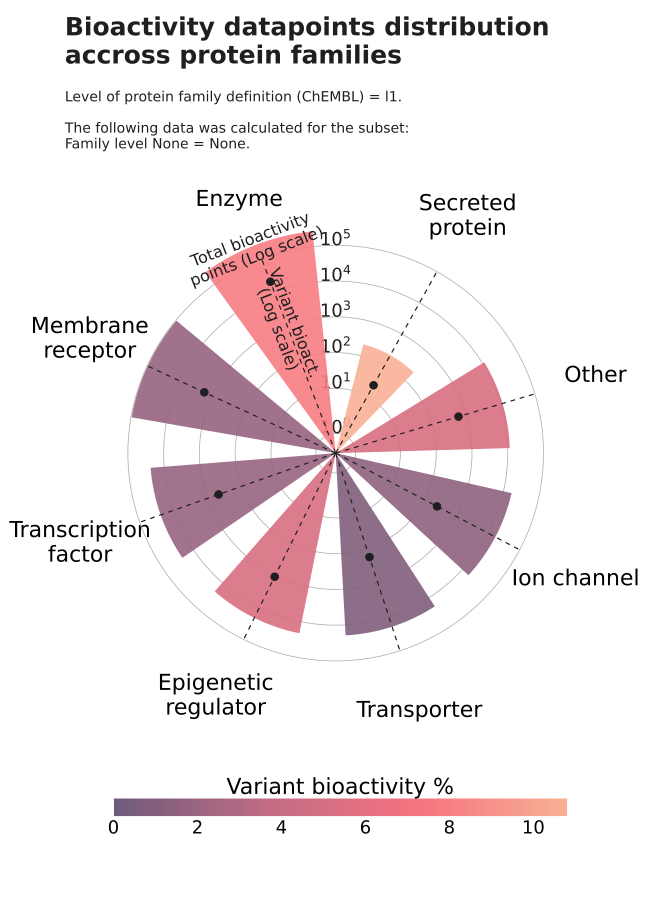

                      activity_mut  activity_all  mut_ratio
l1                                                         
Enzyme                       20759        266328   7.794524
Epigenetic regulator          1105         21244   5.201469
Ion channel                    245         17036   1.438131
Membrane receptor             1730         96037   1.801389
Other                          590         11432   5.160952
Secreted protein                23           212  10.849057
Transcription factor           458         23975   1.910323
Transporter                    176         19575   0.899106


C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:356: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


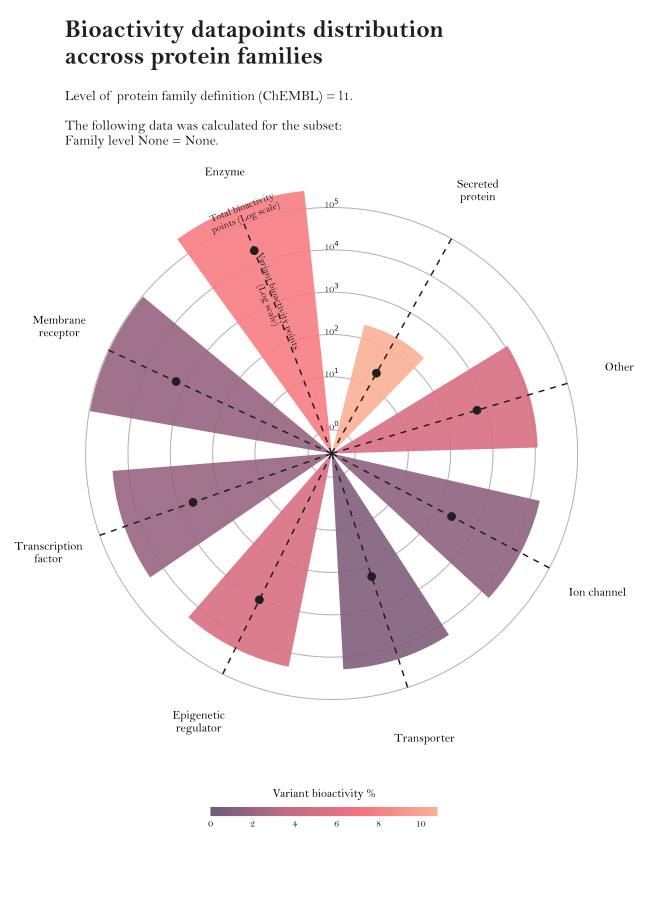

In [12]:
for figure_panel in [True, False]:
    figpath = plot_circular_barplot_families(annotated_data_families, 'l1', family_analysis_dir, subset_level=None, subset_family=None,
                                             save=True, figure_panel=figure_panel)
    display(SVG(data=figpath))

                             activity_mut  activity_all  mut_ratio
l2                                                                
Cytochrome P450                         4            23  17.391304
Electrochemical transporter           162          9574   1.692083
Eraser                                 42         14553   0.288600
GPCR                                 1730         96037   1.801389
Hydrolase                            3209         16267  19.727055
Kinase                              12243        134048   9.133296
Ligand-gated ion channel               73          4410   1.655329
Lyase                                  48          7237   0.663258
Nuclear receptor                      359         14359   2.500174
Other                                2096         50645   4.138612
Oxidoreductase                       2884         32352   8.914441
Phosphatase                            67          5135   1.304771
Phosphodiesterase                      52         10385   0.50

C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:356: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


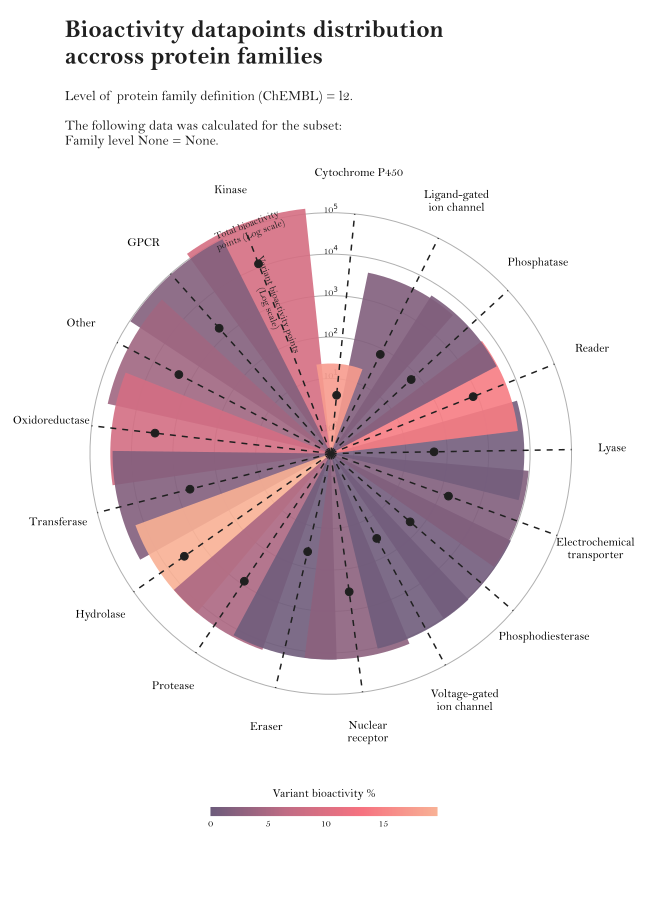

In [13]:
figpath = plot_circular_barplot_families(annotated_data_families, 'l2', family_analysis_dir, subset_level=None, subset_family=None,
                                         save=True)
display(SVG(data=figpath))

                               activity_mut  activity_all  mut_ratio
l4                                                                  
AGC protein kinase group               1385         10570  13.103122
Atypical protein kinase group            80          4888   1.636661
CAMK protein kinase group                 3           186   1.612903
CK1 protein kinase group                  8            42  19.047619
CMGC protein kinase group                24         18749   0.128007
Other protein kinase group              146          9161   1.593712
STE protein kinase group                 28          1073   2.609506
TK protein kinase group                5925         76095   7.786320
TKL protein kinase group               4644         13284  34.959350


C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:356: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


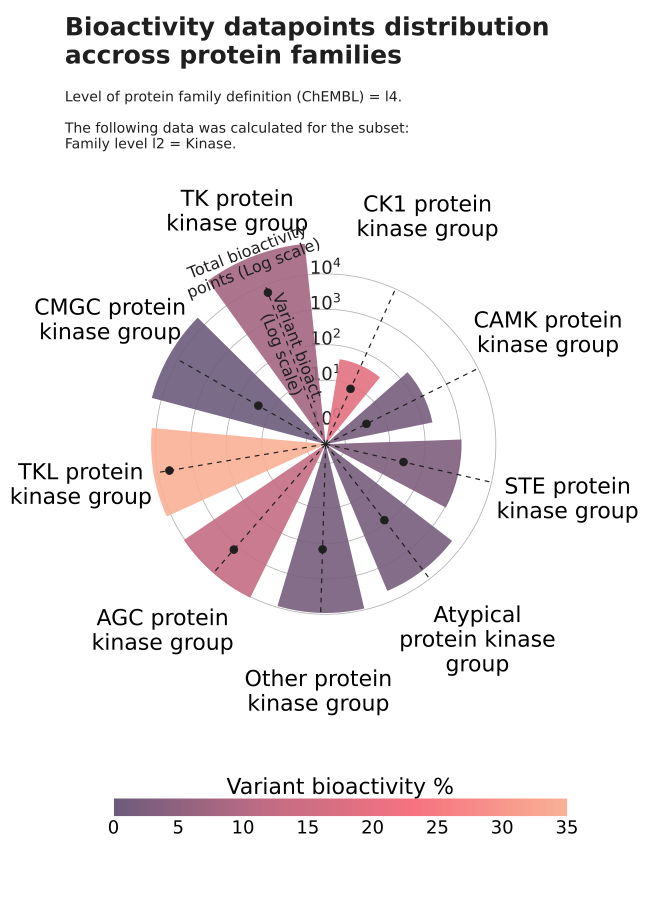

                               activity_mut  activity_all  mut_ratio
l4                                                                  
AGC protein kinase group               1385         10570  13.103122
Atypical protein kinase group            80          4888   1.636661
CAMK protein kinase group                 3           186   1.612903
CK1 protein kinase group                  8            42  19.047619
CMGC protein kinase group                24         18749   0.128007
Other protein kinase group              146          9161   1.593712
STE protein kinase group                 28          1073   2.609506
TK protein kinase group                5925         76095   7.786320
TKL protein kinase group               4644         13284  34.959350


C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:356: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


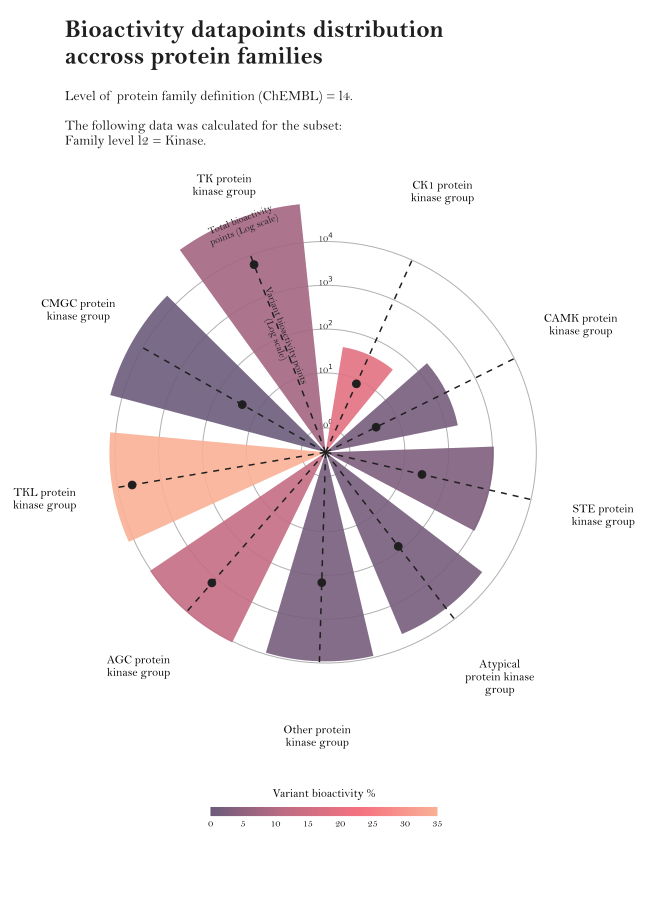

In [14]:
for figure_panel in [True,False]:
    figpath = plot_circular_barplot_families(annotated_data_families, 'l4', family_analysis_dir, subset_level='l2', subset_family='Kinase',
                                              save=True, figure_panel=figure_panel)
    display(SVG(data=figpath))

                                            activity_mut  activity_all  \
l4                                                                       
Chemokine receptor                                   191          3391   
Lipid-like ligand receptor (family A GPCR)            31         13281   
Monoamine receptor                                   310         35427   
Neurotransmitter receptor (family C GPCR)             26          1527   
Nucleotide-like receptor (family A GPCR)             233         10208   
Other                                                 29          1054   
Short peptide receptor (family A GPCR)               910         31149   

                                            mut_ratio  
l4                                                     
Chemokine receptor                           5.632557  
Lipid-like ligand receptor (family A GPCR)   0.233416  
Monoamine receptor                           0.875039  
Neurotransmitter receptor (family C GPCR)    1.702685

C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:356: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


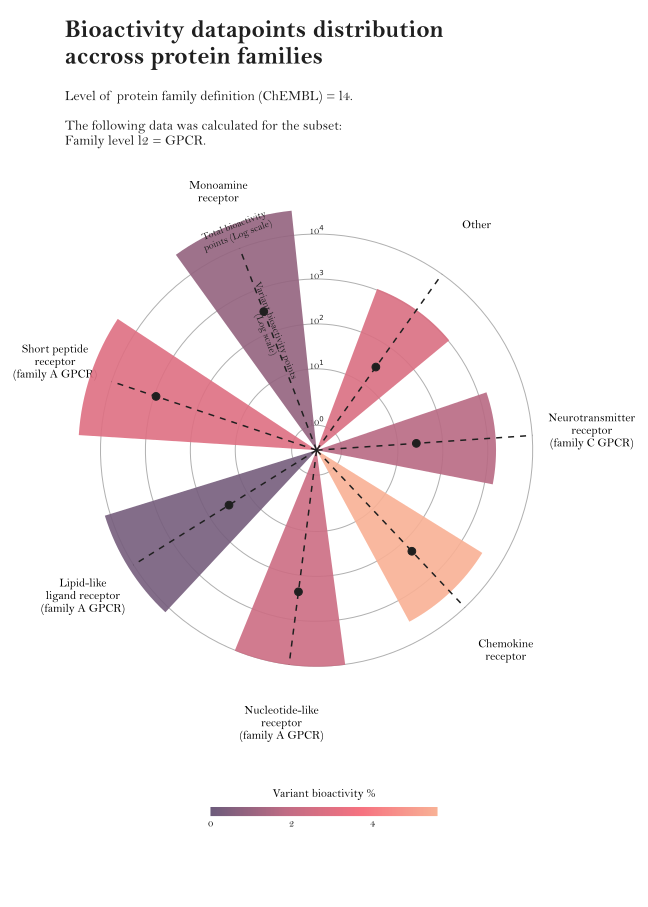

In [15]:
figpath = plot_circular_barplot_families(annotated_data_families, 'l4', family_analysis_dir, subset_level='l2', subset_family='GPCR',
                                          save=True, figure_panel=False)
display(SVG(data=figpath))

                                      activity_mut  activity_all  mut_ratio
l5                                                                         
Tyrosine protein kinase Abl family            1149          5079  22.622563
Tyrosine protein kinase Axl family               1           890   0.112360
Tyrosine protein kinase DDR family              26           284   9.154930
Tyrosine protein kinase EGFR family           2622         16066  16.320179
Tyrosine protein kinase Eph family               3           106   2.830189
Tyrosine protein kinase FGFR family            177          7748   2.284461
Tyrosine protein kinase Fak family              25          1620   1.543210
Tyrosine protein kinase JakB family            131          5989   2.187343
Tyrosine protein kinase Met family             129          4992   2.584135
Tyrosine protein kinase PDGFR family          1133          8186  13.840704
Tyrosine protein kinase Ret family             281          2123  13.235987
Tyrosine pro

C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:356: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


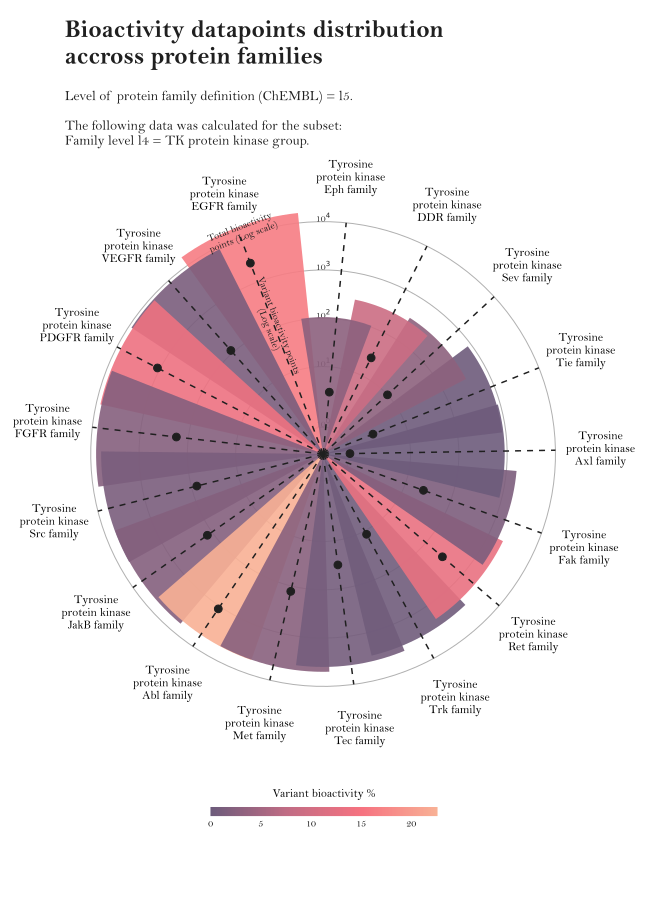

In [16]:
figpath = plot_circular_barplot_families(annotated_data_families, 'l5', family_analysis_dir, subset_level='l4', subset_family='TK protein kinase '
                                          'group', save=True)
display(SVG(data=figpath))

### Analysis of ChEMBL mutant annotation coverage per family

Read ChEMBL bioactivity data from annotation pipeline, containing new ("target_id") and old ("mutation") mutant
annotations.

In [17]:
# Read ChEMBL-only annotated bioactivity data for variants
chembl_annotated_data = chembl_annotation(chembl_version, annotation_round)
chembl_annotated_data

C:\Users\gorostiolam\AppData\Local\Continuum\anaconda3\envs\mutants-in-pcm\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  


,target_id,chembl_id,assay_id,activity_id,accession,pchembl_value,activity_comment,canonical_smiles,mutation,year,sequence,pchembl_value_Mean,Activity_class
0,A0A024AXB9_WT,CHEMBL1230673,[1986298],[20667385],A0A024AXB9,[6.37],[nan],CN[C@@H](C)C(=O)N[C@H](C(=O)N1CC[C@H](C)[C@H]1...,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,6.370000,NaN
1,A0A024AXB9_WT,CHEMBL1332616,"[1986298, 1986301]","[20667410, 20667411]",A0A024AXB9,"[5.77, 6.22]","[nan, nan]",O=C1OC2(c3ccccc31)c1cc(I)c(O)c(I)c1Oc1c2cc(I)c...,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,5.995000,NaN
2,A0A024AXB9_WT,CHEMBL151,[1855280],[19053938],A0A024AXB9,[4.28],[nan],O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,4.280000,NaN
3,A0A024AXB9_WT,CHEMBL1535,[1986298],[20667415],A0A024AXB9,[4.04],[nan],CCN(CCO)CCCC(C)Nc1ccnc2cc(Cl)ccc12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,4.040000,NaN
4,A0A024AXB9_WT,CHEMBL164,"[1855280, 1855317, 1855317]","[19053935, 19053936, 19053937]",A0A024AXB9,"[4.66, 5.89, 6.1]","[nan, nan, nan]",O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,5.550000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870743,nan_WT,CHEMBL529,"[582849, 582849, 582849]","[2702686, 2702686, 2702686]",NaN,"[6.52, 6.52, 6.52]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,6.520000,NaN
1870744,nan_WT,CHEMBL532,"[576183, 576183, 576183, 576182, 576182, 57618...","[2663798, 2663798, 2663798, 2663799, 2663799, ...",NaN,"[7.54, 7.54, 7.54, 7.96, 7.96, 7.96, 5.72, 5.7...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2007.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,6.418889,NaN
1870745,nan_WT,CHEMBL553222,"[582849, 582849, 582849]","[2702683, 2702683, 2702683]",NaN,"[7.0, 7.0, 7.0]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,7.000000,NaN
1870746,nan_WT,CHEMBL557931,"[582849, 582849, 582849]","[2702682, 2702682, 2702682]",NaN,"[5.89, 5.89, 5.89]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,5.890000,NaN


In [18]:
chembl_annotated_data_families = link_bioactivity_to_family(chembl_annotated_data, chembl_families)
chembl_annotated_data_families

,target_id,chembl_id,assay_id,activity_id,accession,pchembl_value,activity_comment,canonical_smiles,mutation,year,sequence,pchembl_value_Mean,Activity_class,l1,l2,l3,l4,l5
0,A0A024AXB9_WT,CHEMBL1230673,[1986298],[20667385],A0A024AXB9,[6.37],[nan],CN[C@@H](C)C(=O)N[C@H](C(=O)N1CC[C@H](C)[C@H]1...,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,6.370000,NaN,Other,Other,Other,Other,Other
1,A0A024AXB9_WT,CHEMBL1332616,"[1986298, 1986301]","[20667410, 20667411]",A0A024AXB9,"[5.77, 6.22]","[nan, nan]",O=C1OC2(c3ccccc31)c1cc(I)c(O)c(I)c1Oc1c2cc(I)c...,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,5.995000,NaN,Other,Other,Other,Other,Other
2,A0A024AXB9_WT,CHEMBL151,[1855280],[19053938],A0A024AXB9,[4.28],[nan],O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,4.280000,NaN,Other,Other,Other,Other,Other
3,A0A024AXB9_WT,CHEMBL1535,[1986298],[20667415],A0A024AXB9,[4.04],[nan],CCN(CCO)CCCC(C)Nc1ccnc2cc(Cl)ccc12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,4.040000,NaN,Other,Other,Other,Other,Other
4,A0A024AXB9_WT,CHEMBL164,"[1855280, 1855317, 1855317]","[19053935, 19053936, 19053937]",A0A024AXB9,"[4.66, 5.89, 6.1]","[nan, nan, nan]",O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,5.550000,NaN,Other,Other,Other,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870743,nan_WT,CHEMBL529,"[582849, 582849, 582849]","[2702686, 2702686, 2702686]",NaN,"[6.52, 6.52, 6.52]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,6.520000,NaN,Other,Other,Other,Other,Other
1870744,nan_WT,CHEMBL532,"[576183, 576183, 576183, 576182, 576182, 57618...","[2663798, 2663798, 2663798, 2663799, 2663799, ...",NaN,"[7.54, 7.54, 7.54, 7.96, 7.96, 7.96, 5.72, 5.7...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2007.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,6.418889,NaN,Other,Other,Other,Other,Other
1870745,nan_WT,CHEMBL553222,"[582849, 582849, 582849]","[2702683, 2702683, 2702683]",NaN,"[7.0, 7.0, 7.0]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,7.000000,NaN,Other,Other,Other,Other,Other
1870746,nan_WT,CHEMBL557931,"[582849, 582849, 582849]","[2702682, 2702682, 2702682]",NaN,"[5.89, 5.89, 5.89]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,5.890000,NaN,Other,Other,Other,Other,Other


Plot circular barplots

                      mut_new  mut_all  mut_ratio
l1                                               
Enzyme                 3631.0    20779  17.474373
Epigenetic regulator     70.0     1174   5.962521
Ion channel               6.0      250   2.400000
Membrane receptor       218.0     1758  12.400455
Other                    75.0      626  11.980831
Transcription factor     42.0      472   8.898305
Transporter               3.0      177   1.694915
Secreted protein          NaN       23   0.000000


C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:623: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


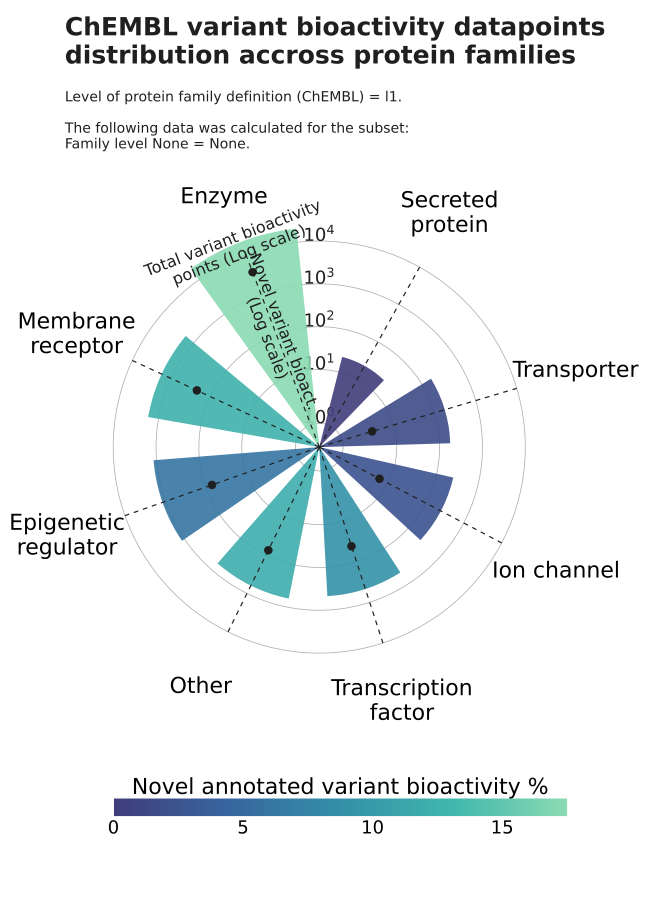

                      mut_new  mut_all  mut_ratio
l1                                               
Enzyme                 3631.0    20779  17.474373
Epigenetic regulator     70.0     1174   5.962521
Ion channel               6.0      250   2.400000
Membrane receptor       218.0     1758  12.400455
Other                    75.0      626  11.980831
Transcription factor     42.0      472   8.898305
Transporter               3.0      177   1.694915
Secreted protein          NaN       23   0.000000


C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:623: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


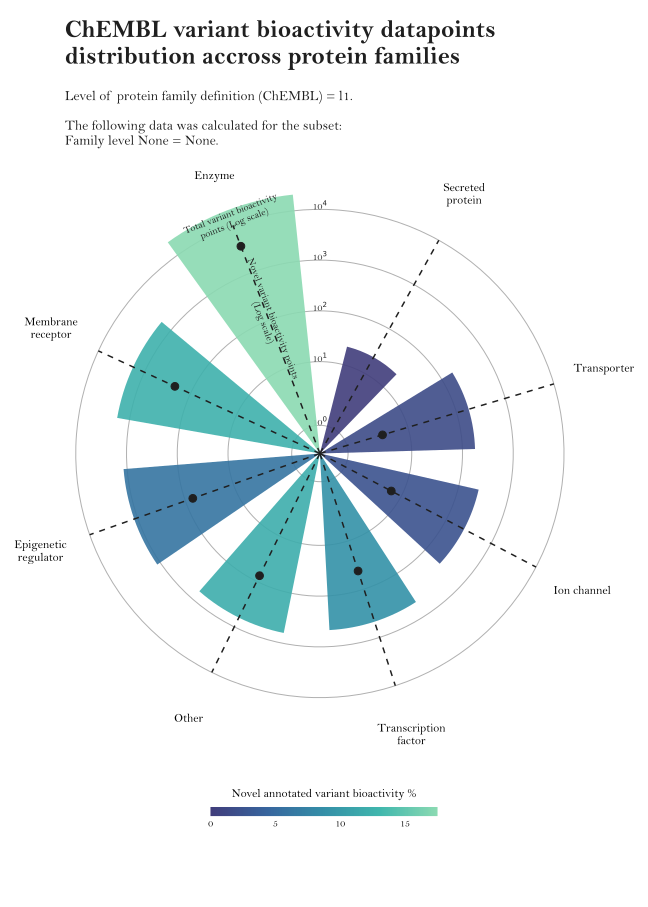

In [19]:
for figure_panel in [True,False]:
    figpath = plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l1', family_analysis_dir,
                                                             save=True, figure_panel=figure_panel)
    display(SVG(data=figpath))

                             mut_new  mut_all  mut_ratio
l2                                                      
Eraser                           5.0       43  11.627907
GPCR                           218.0     1758  12.400455
Hydrolase                      303.0     3284   9.226553
Kinase                        2415.0    11879  20.329994
Nuclear receptor                42.0      366  11.475410
Other                          146.0     2233   6.538289
Oxidoreductase                 794.0     3111  25.522340
Phosphatase                     20.0       67  29.850746
Phosphodiesterase               16.0       53  30.188679
Protease                        50.0      909   5.500550
Reader                          10.0      817   1.223990
Transferase                     26.0      417   6.235012
Cytochrome P450                  NaN        4   0.000000
Electrochemical transporter      NaN      163   0.000000
Ligand-gated ion channel         NaN       73   0.000000
Lyase                          

C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:623: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


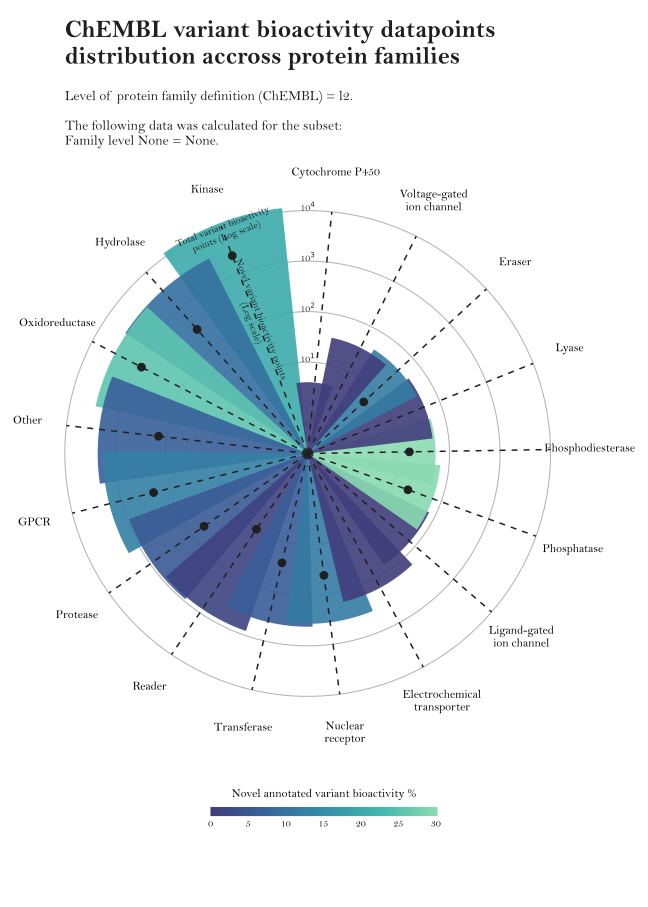

In [20]:
figpath = plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l2', family_analysis_dir,
                                              save=True)
display(SVG(data=figpath))

                               mut_new  mut_all  mut_ratio
l4                                                        
AGC protein kinase group        1302.0     1452  89.669421
CMGC protein kinase group          4.0       24  16.666667
Other protein kinase group         4.0      116   3.448276
TK protein kinase group          280.0     5473   5.116024
TKL protein kinase group         825.0     4695  17.571885
Atypical protein kinase group      NaN       80   0.000000
CAMK protein kinase group          NaN        3   0.000000
CK1 protein kinase group           NaN        8   0.000000
STE protein kinase group           NaN       28   0.000000


C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:623: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


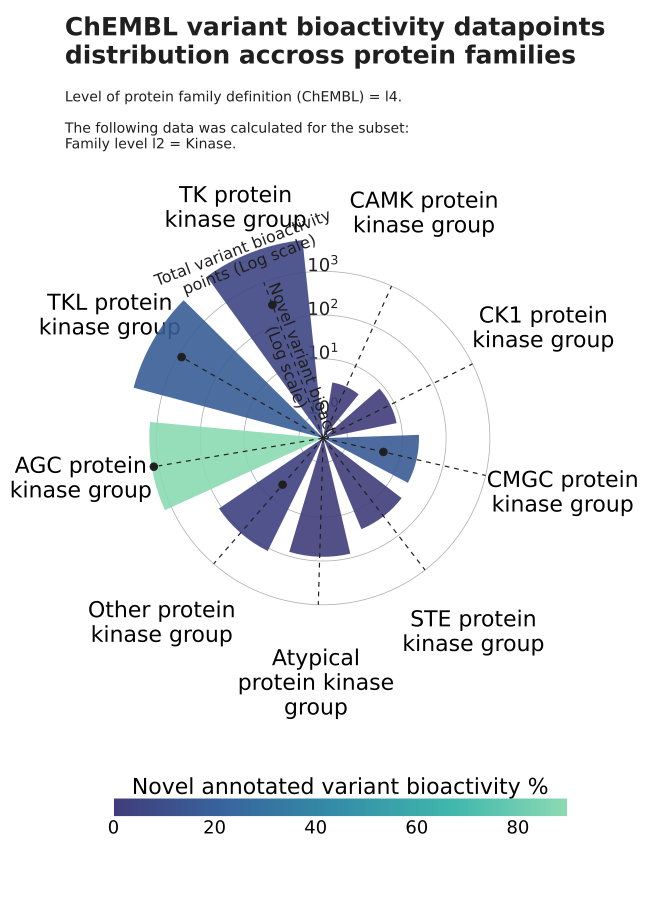

                               mut_new  mut_all  mut_ratio
l4                                                        
AGC protein kinase group        1302.0     1452  89.669421
CMGC protein kinase group          4.0       24  16.666667
Other protein kinase group         4.0      116   3.448276
TK protein kinase group          280.0     5473   5.116024
TKL protein kinase group         825.0     4695  17.571885
Atypical protein kinase group      NaN       80   0.000000
CAMK protein kinase group          NaN        3   0.000000
CK1 protein kinase group           NaN        8   0.000000
STE protein kinase group           NaN       28   0.000000


C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:623: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


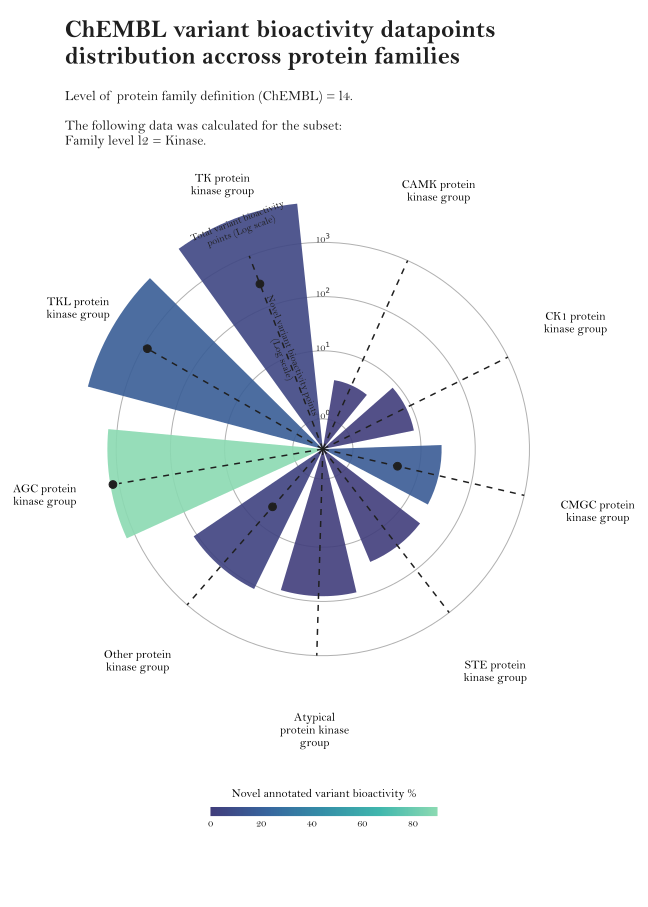

In [21]:
for figure_panel in [True,False]:
    figpath = plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l4', family_analysis_dir, subset_level='l2',
                                                            subset_family='Kinase', save=True, figure_panel=figure_panel)
    display(SVG(data=figpath))

                                            mut_new  mut_all  mut_ratio
l4                                                                     
Monoamine receptor                             37.0      321  11.526480
Nucleotide-like receptor (family A GPCR)       43.0      233  18.454936
Short peptide receptor (family A GPCR)        138.0      927  14.886731
Chemokine receptor                              NaN      191   0.000000
Lipid-like ligand receptor (family A GPCR)      NaN       31   0.000000
Neurotransmitter receptor (family C GPCR)       NaN       26   0.000000
Other                                           NaN       29   0.000000


C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:623: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


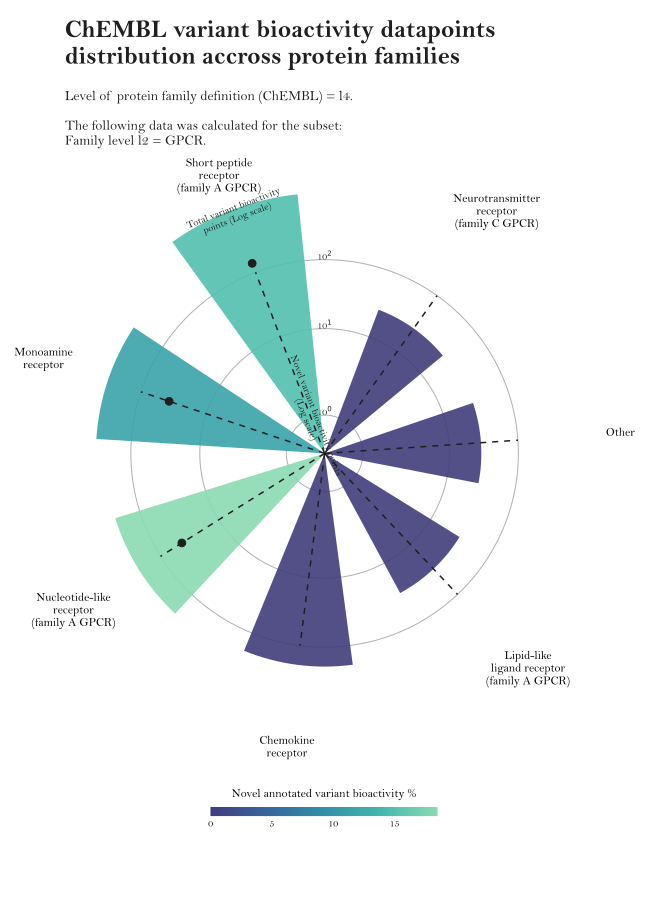

In [22]:
figpath = plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l4', family_analysis_dir, subset_level='l2',
                                                        subset_family='GPCR', save=True)
display(SVG(data=figpath))

                                      mut_new  mut_all   mut_ratio
l5                                                                
Tyrosine protein kinase Abl family       27.0      994    2.716298
Tyrosine protein kinase EGFR family     169.0     2547    6.635257
Tyrosine protein kinase FGFR family      46.0      145   31.724138
Tyrosine protein kinase Fak family       25.0       25  100.000000
Tyrosine protein kinase Ret family        3.0      255    1.176471
Tyrosine protein kinase Src family       10.0       77   12.987013
Tyrosine protein kinase Axl family        NaN        1    0.000000
Tyrosine protein kinase DDR family        NaN       26    0.000000
Tyrosine protein kinase Eph family        NaN        4    0.000000
Tyrosine protein kinase JakB family       NaN      131    0.000000
Tyrosine protein kinase Met family        NaN      115    0.000000
Tyrosine protein kinase PDGFR family      NaN      978    0.000000
Tyrosine protein kinase Sev family        NaN       10    0.00

C:\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\src\mutants_in_pcm\mutant_analysis_family.py:623: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


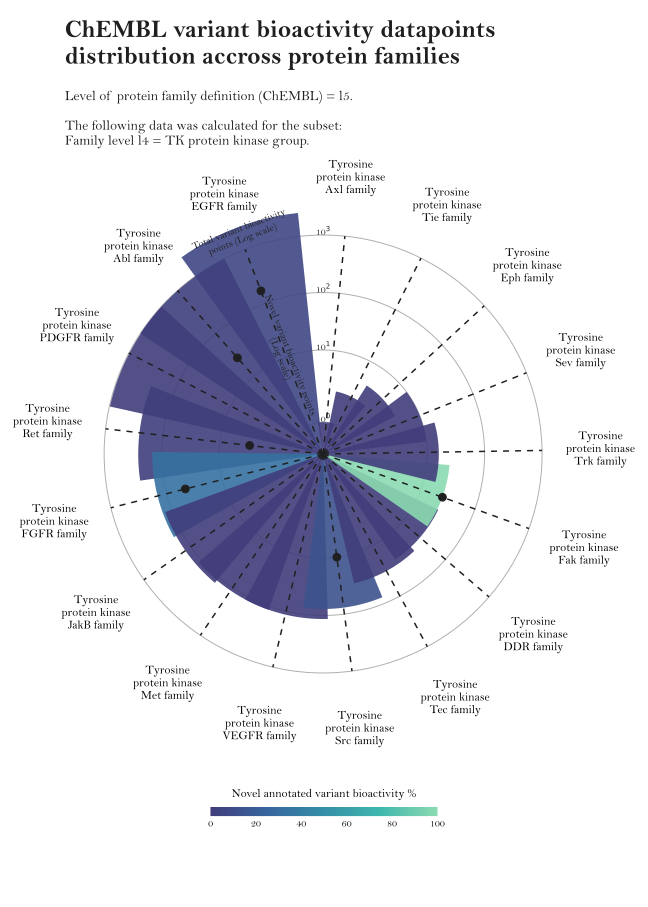

In [23]:
figpath = plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l5', family_analysis_dir, subset_level='l4',
                                                        subset_family='TK protein kinase group', save=True)
display(SVG(data=figpath))